In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import pynucl
import random as r
from Bio import SeqIO
import numpy as np
from collections import Counter
import matplotlib.cm as cm
from tqdm.auto import tqdm
import MDAnalysis as mda
import nglview as nv

In [163]:
subs_df = pd.read_csv('subs_df.csv')
his_table = pd.read_csv('histones.csv')

{'cenH3', 'H3.3', 'cH2B', 'H2A.L', 'H2A.Z', 'H2A.B', 'H2A.X', 'H2B.1', 'H2B.W', 'H2A.P', 'macroH2A', 'H2B.Z', 'subH2B', 'H2A.1', 'cH4', 'cH3', 'cH2A', 'H2A.W'}


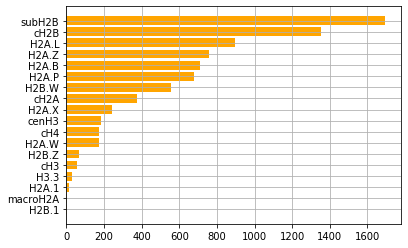

In [153]:
set_a = set(subs_df['a_variant'].unique())
set_b = set(subs_df['b_variant'].unique())
variants = set_a.union(set_b)
print(variants)
his_dict = {}


for his in variants:
    req = subs_df.loc[(subs_df['a_variant']==his) | (subs_df['b_variant']==his)]
    his_dict[his] = len(req)

his_dict = {res: his_dict[res] for res in 
                          sorted(his_dict, key=his_dict.get)}    
width = list(his_dict.values())
y = list(his_dict.keys())

plt.barh(y, width, color="orange")
plt.grid()

In [ ]:
set_a = set(subs_df['a_variant'].unique())
set_b = set(subs_df['b_variant'].unique())
variants = set_a.union(set_b)
print(variants)
his_dict = {}


for his in variants:
    req = subs_df.loc[(subs_df['a_variant']==his) | (subs_df['b_variant']==his)]
    his_dict[his] = len(req)

his_dict = {res: his_dict[res] for res in 
                          sorted(his_dict, key=his_dict.get)}    
width = list(his_dict.values())
y = list(his_dict.keys())

plt.barh(y, width, color="orange")
plt.grid()

In [154]:
matrix_dict = {}

for a_variant_ind in variants:
    matrix_dict[a_variant_ind] = []
    for b_variant_col in variants:
        series = subs_df.loc[(subs_df['b_variant']==b_variant_col) & (subs_df['a_variant']==a_variant_ind)]
        amount = len(series)
        matrix_dict[a_variant_ind].append(amount)
              
matrix = pd.DataFrame(matrix_dict, index=matrix_dict.keys())
display(matrix)


,cenH3,H3.3,cH2B,H2A.L,H2A.Z,H2A.B,H2A.X,H2B.1,H2B.W,H2A.P,macroH2A,H2B.Z,subH2B,H2A.1,cH4,cH3,cH2A,H2A.W
cenH3,0,0,0,12,28,12,14,0,0,6,0,0,0,0,8,0,10,2
H3.3,0,0,0,0,2,0,4,0,0,0,0,0,0,0,9,0,0,0
cH2B,0,0,0,0,315,4,88,0,0,3,3,0,0,0,22,0,158,84
H2A.L,12,0,0,0,0,0,0,0,118,0,0,0,319,0,0,0,0,0
H2A.Z,28,2,315,0,0,0,0,0,0,0,0,14,0,0,19,1,0,0
H2A.B,12,0,4,0,0,0,0,0,60,0,0,0,278,0,0,0,0,0
H2A.X,14,4,88,0,0,0,0,0,1,0,0,9,5,0,0,0,0,0
H2B.1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
H2B.W,0,0,0,118,0,60,1,0,0,97,0,0,0,0,0,0,1,0
H2A.P,6,0,3,0,0,0,0,1,97,0,0,0,232,0,0,0,0,0


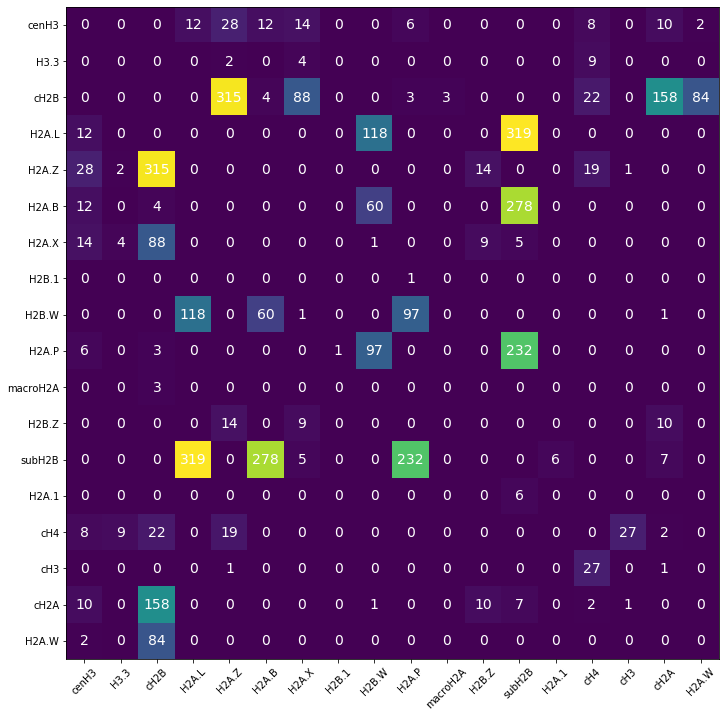

In [155]:
names = matrix_dict.keys()
tick_range = range(len(names))
matrix = np.array(matrix)

plt.figure(figsize=(12, 12))
plt.imshow(matrix)
plt.xticks(tick_range, names, rotation=45)
plt.yticks(tick_range, names)
for i in range(len(matrix)):
    for j in range(len(matrix)):
        text = plt.text(j, i, matrix[i, j],
                       ha="center", va="center", fontsize=14, color="w")

In [156]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000',
          '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#000000']

In [157]:
aminoacids = ['P', 'S', 'V', 'R', 'T', 'E', 'D', 'A', 'G', 'N', 'Q', 'K', 'I', 'L', 'M', 'F', 'Y', 'W', 'H', 'C', '-']

In [158]:
colors_dict = {res: color for res, color in zip(aminoacids, colors)}
colors_dict

{'P': '#e6194b',
 'S': '#3cb44b',
 'V': '#ffe119',
 'R': '#4363d8',
 'T': '#f58231',
 'E': '#911eb4',
 'D': '#46f0f0',
 'A': '#f032e6',
 'G': '#bcf60c',
 'N': '#fabebe',
 'Q': '#008080',
 'K': '#e6beff',
 'I': '#9a6324',
 'L': '#fffac8',
 'M': '#800000',
 'F': '#aaffc3',
 'Y': '#808000',
 'W': '#ffd8b1',
 'H': '#000075',
 'C': '#808080',
 '-': '#000000'}

In [159]:
def get_percentage(pct):
    if pct > 1.5:
        return "{:1.1f}%".format(pct)
    
print(2148 / len(h2a))
print(len(h2a))

16.78125
128


3852
3670
272
174


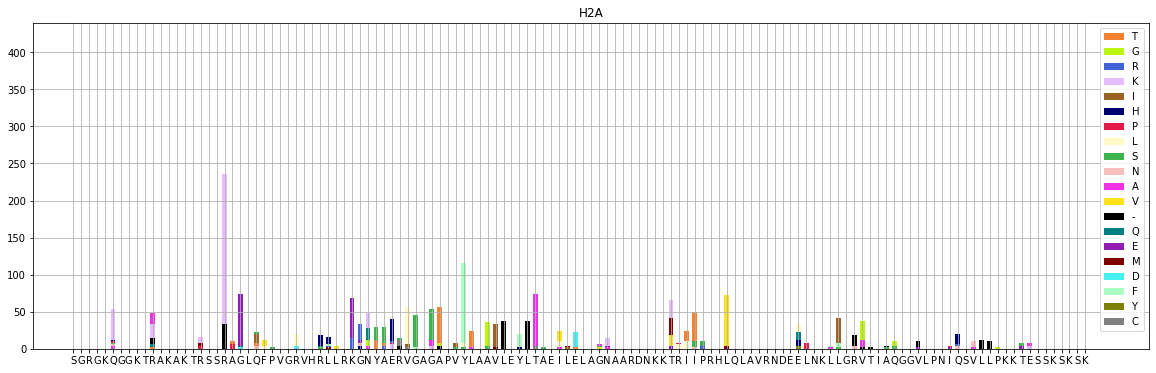

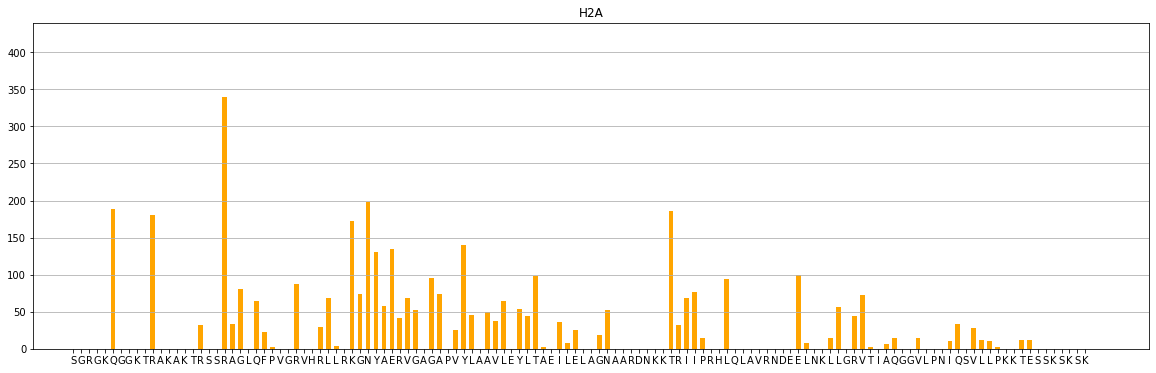

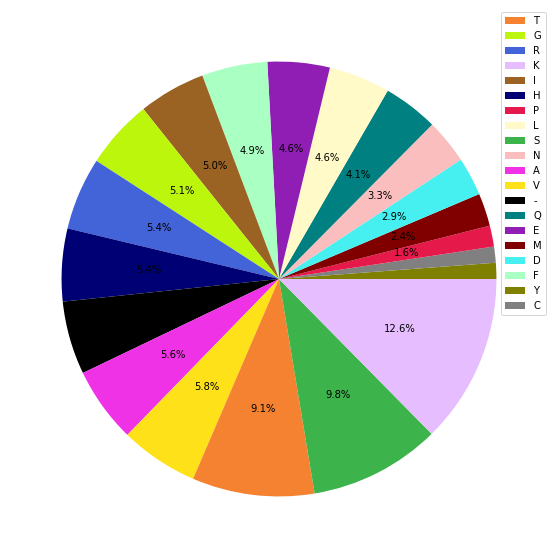

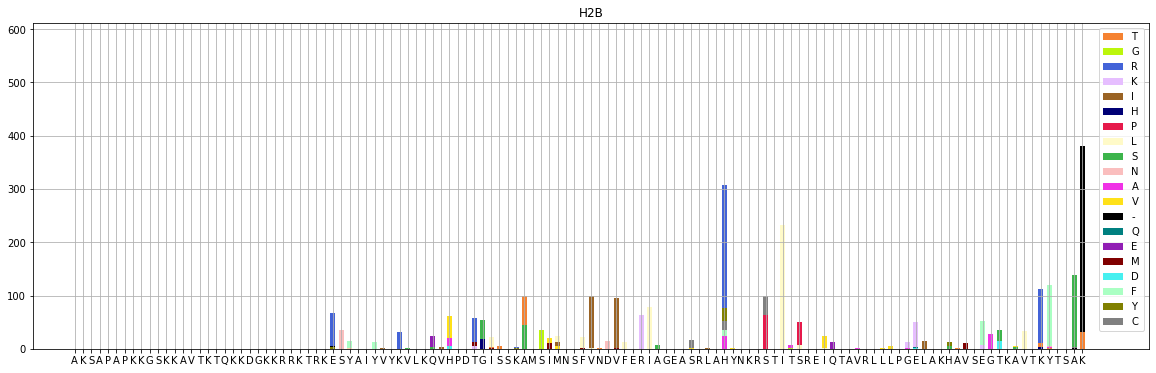

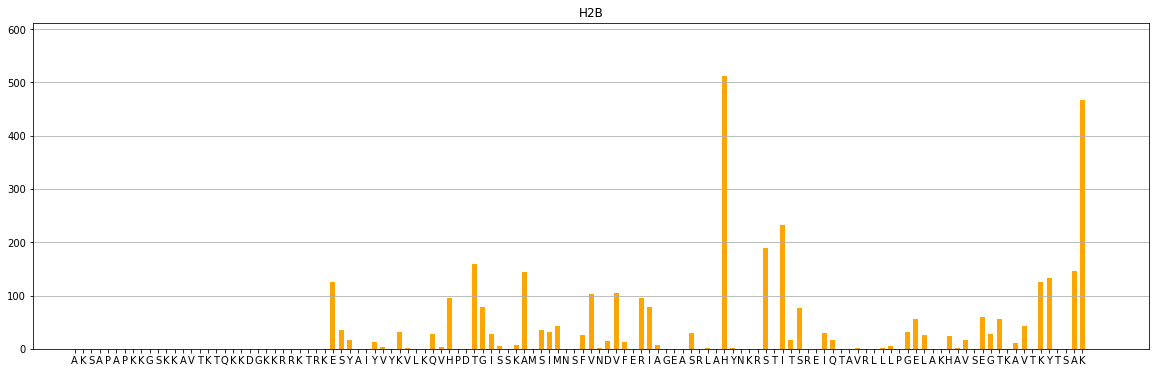

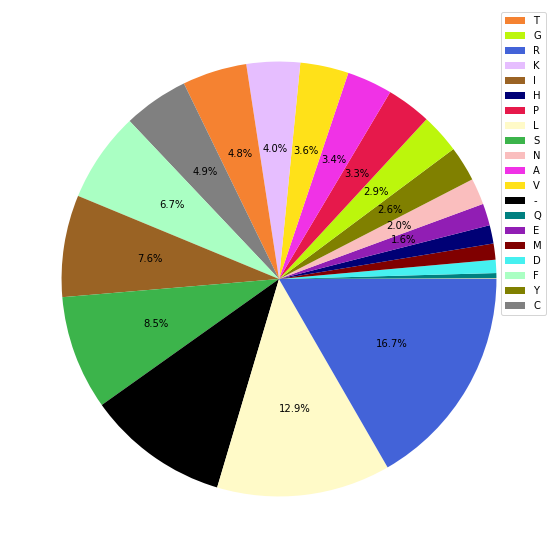

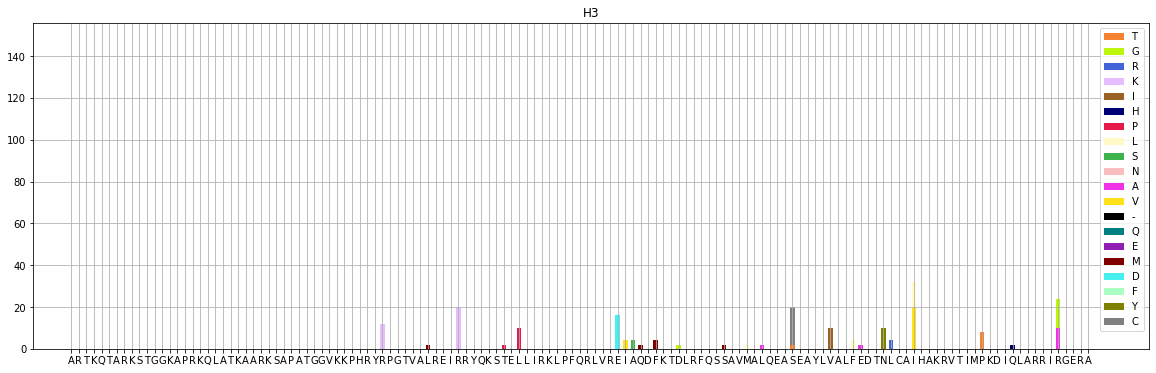

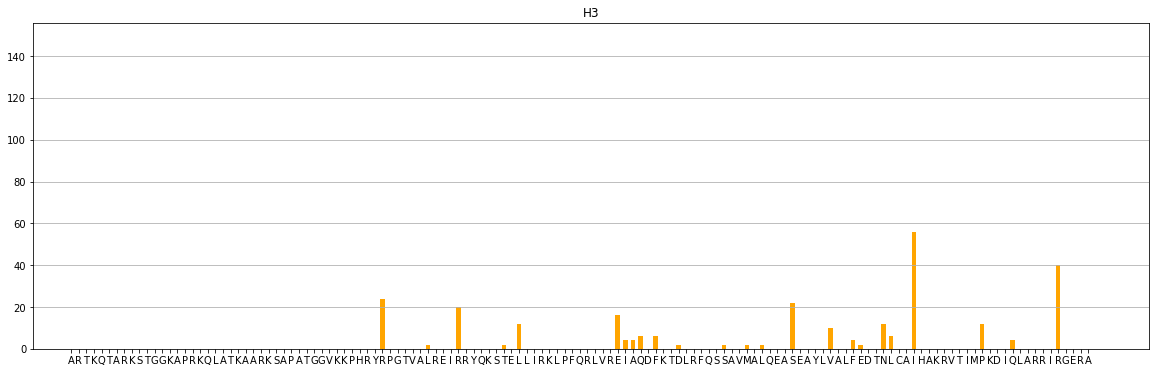

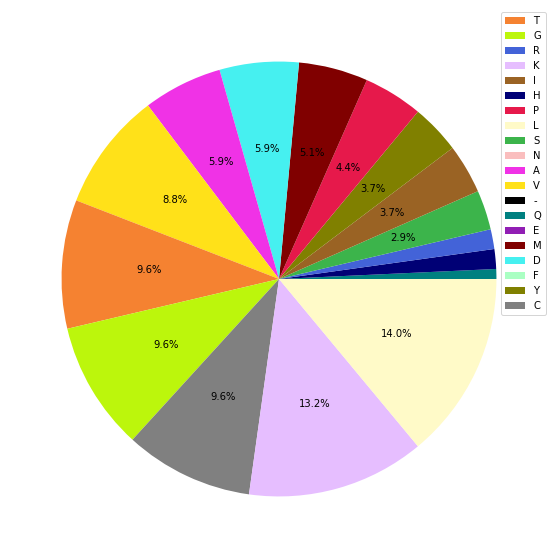

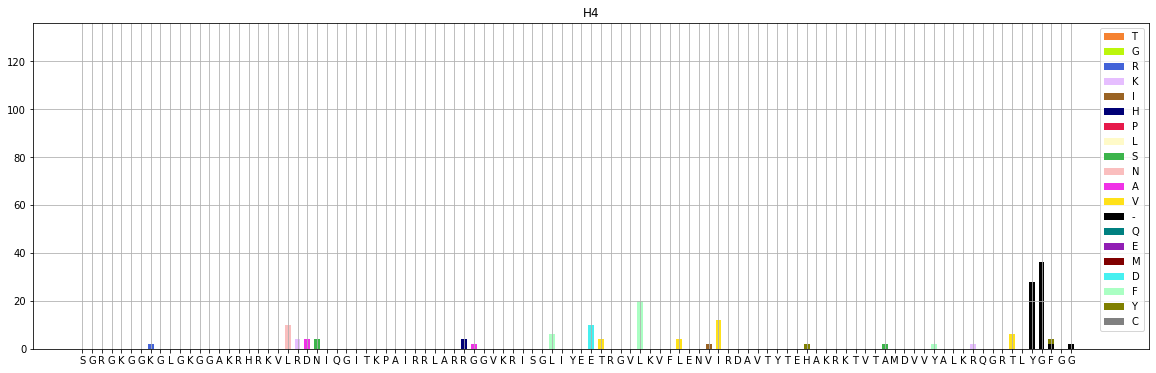

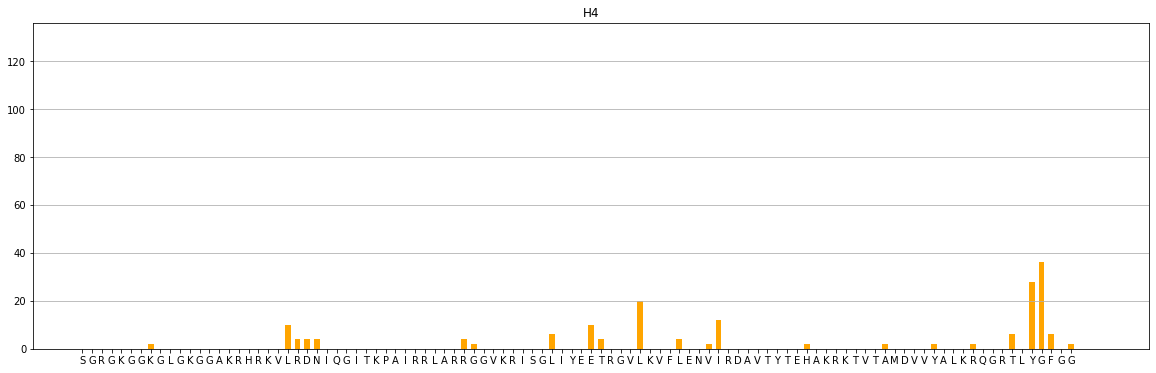

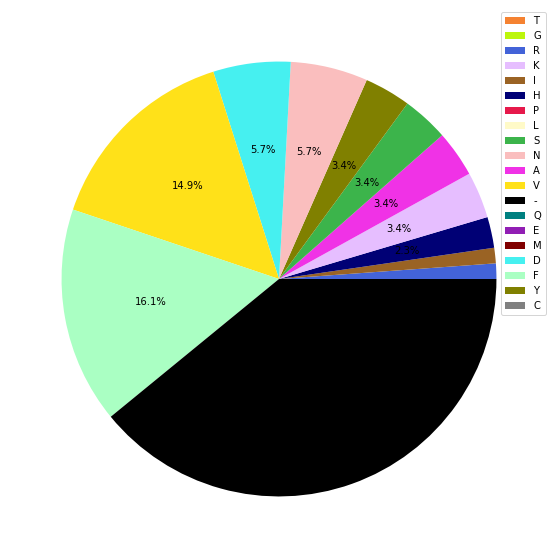

In [160]:
h2a = 'SGRGKQGGKTRAKAKTRSSRAGLQFPVGRVHRLLRKGNYAERVGAGAPVYLAAVLEYLTAEILELAGNAARDNKKTRIIPRHLQLAVRNDEELNKLLGRVTIAQGGVLPNIQSVLLPKKTESSKSKSK'
h2b = 'AKSAPAPKKGSKKAVTKTQKKDGKKRRKTRKESYAIYVYKVLKQVHPDTGISSKAMSIMNSFVNDVFERIAGEASRLAHYNKRSTITSREIQTAVRLLLPGELAKHAVSEGTKAVTKYTSAK'
h3 =  'ARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEASEAYLVALFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA'
h4 =  'SGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKRISGLIYEETRGVLKVFLENVIRDAVTYTEHAKRKTVTAMDVVYALKRQGRTLYGFGG'


core_histones = [h2a, h2b, h3, h4]
names = ['H2A', 'H2B', 'H3', 'H4']
permanent_bars = []
permanent_labels = []
global_mut_counter = []
expected_counters = []
flag = 1


for his, name in zip(core_histones, names):
    mut_counter = [0 for i in range(len(his))]
    expected_counter = 0
    a_pos = subs_df.loc[subs_df['a_entity']==name]['a_resid']
    b_pos = subs_df.loc[subs_df['b_entity']==name]['b_resid']
    positions = pd.concat([a_pos, b_pos])
    for pos in positions:
        pos_index = pos - 1
        mut_counter[pos_index] += 1     
    global_mut_counter.append(mut_counter)

    

    used_res = set()
    plt.figure(figsize=(20, 6))
    plt.ylim(0, max(mut_counter)+100)
    plt.xlim(-5, len(his) + 7)
    plt.xticks(range(0, len(his)), labels=[res for res in his])
    plt.grid()
    plt.title(name)
    for i in range(len(mut_counter)):
        cur_pos = mut_counter[i]
        if cur_pos != 0:
            a_residues = subs_df.loc[(subs_df['a_resid']==i + 1) & (subs_df['a_entity']==name)]['a_new_resname']
            b_residues = subs_df.loc[(subs_df['b_resid']==i + 1) & (subs_df['b_entity']==name)]['b_new_resname']  
            residues = pd.concat([a_residues, b_residues])
            counter = dict(Counter(residues))
            for amount, res in zip(counter.values(), counter.keys()):
                point_color = colors_dict[res]
                if flag==1 and res not in used_res:
                    bar = plt.bar(i, amount, color=point_color, width=0.6, label=res)
                    permanent_labels.append(res)
                    permanent_bars.append(bar)
                    used_res.add(res)
                else:
                    plt.bar(i, amount, color=point_color, width=0.6)    
                expected_counter += amount
    print(expected_counter)
    expected_counters.append(expected_counter)
    plt.legend(permanent_bars, permanent_labels)
    used_res.clear()
    
      
        
    plt.figure(figsize=(20, 6))
    plt.title(name)
    plt.xlim(-5, len(his) + 7)
    plt.ylim(0, max(mut_counter)+100)
    plt.grid(axis='y')
    plt.bar(range(len(his)), mut_counter, width=0.6, color='orange')
    plt.xticks(range(0, len(his)), labels=[res for res in his])
    
    
    global_res_counter = Counter()
    for i in range(len(mut_counter)):
        cur_pos = mut_counter[i]
        if cur_pos != 0:
            a_residues = subs_df.loc[(subs_df['a_resid']==i + 1) & (subs_df['a_entity']==name)]['a_new_resname']
            b_residues = subs_df.loc[(subs_df['b_resid']==i + 1) & (subs_df['b_entity']==name)]['b_new_resname']  
            residues = pd.concat([a_residues, b_residues])
            for res in residues:
                global_res_counter[res] += 1
                
                
    global_res_counter = {res: global_res_counter[res] for res in 
                          sorted(global_res_counter, key=global_res_counter.get)}
    labels = list(global_res_counter.keys())
    sizes = list(global_res_counter.values())
    colors = [colors_dict[res] for res in labels] 
    plt.figure(figsize=(10, 10))
    plt.pie(sizes, labels=labels, colors=colors, autopct=lambda x: get_percentage(x), labeldistance=None)
    plt.legend(permanent_bars, permanent_labels)
    
     
    flag = 0

In [164]:
h2a = 'SGRGKQGGKTRAKAKTRSSRAGLQFPVGRVHRLLRKGNYAERVGAGAPVYLAAVLEYLTAEILELAGNAARDNKKTRIIPRHLQLAVRNDEELNKLLGRVTIAQGGVLPNIQSVLLPKKTESSKSKSK'
h2b = 'AKSAPAPKKGSKKAVTKTQKKDGKKRRKTRKESYAIYVYKVLKQVHPDTGISSKAMSIMNSFVNDVFERIAGEASRLAHYNKRSTITSREIQTAVRLLLPGELAKHAVSEGTKAVTKYTSAK'
h3 =  'ARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEASEAYLVALFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA'
h4 =  'SGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKRISGLIYEETRGVLKVFLENVIRDAVTYTEHAKRKTVTAMDVVYALKRQGRTLYGFGG'

segids = {name: chain for name, chain in zip(names, 'CDAB')}
nucl = mda.Universe('1KX5.pdb').select_atoms('protein or nucleic') # and (segid A or segid B or segid C or segid D)) 


core_histones = [h2a, h2b, h3, h4]
names = ['H2A', 'H2B', 'H3', 'H4']
flag = 1
 
for name, mut_counter, his, ex_counter in zip(names, global_mut_counter, core_histones, expected_counters):
    mean = ex_counter / len(his)
    estimation = [True if num >= mean else False for num in mut_counter]
    view = nv.show_mdanalysis(nucl, gui=True)
    view.clear()
    chain = segids[name]
    print(name, mean)
    atom_ids = nucl.select_atoms(f'protein and segid {chain}').residues.ids
    mroe_mean = np.concatenate([atom_ids[i] for i in range(len(atom_ids)) if estimation[i]])
    view.add_representation('cartoon', nucl.select_atoms(f'not segid {chain}').ids)
    view.add_representation('hyperball', nucl.select_atoms(f'segid {chain}').ids, color='green')
    view.add_representation('contact', nucl.select_atoms(f'segid {chain}').ids, color='green')
    view.add_representation('hyperball', mroe_mean, color='red')
    display(view)


    
    



H2A 30.09375


NGLWidget()

H2B 30.081967213114755


NGLWidget()

H3 2.0148148148148146


NGLWidget()

H4 1.7058823529411764


NGLWidget()

In [ ]:
all_sp = subs_df['species'].unique()
unique_sp = {sp: set() for sp in all_sp}

for sp in all_sp:
    ser = subs_df.loc[subs_df['species']==sp]
    a_acc, b_acc = ser['a_accsession'], ser['b_accsession']
    accs = pd.concat([a_acc, b_acc])
    for acc in accs:
        his_type = his_table.loc[his_table['accession']==acc]['type'].iloc[0]
        unique_sp[sp].add(his_type)

print(unique_sp)

all_his = [sp for sp in unique_sp if len(unique_sp[sp]) == 4]
print(all_his)